# Initializations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Matplotlib is building the font cache; this may take a moment.


# Import data and queries

Note: Your Excel file 'Assignment_1_Data_and_Template.xlsx' must be placed in Google Colab within a folder named '/content'

In [ ]:
imported_data = pd.read_excel('/Users/tolik/Documents/UCSC_Lectures/Lecture1/Assignment_1_Data_and_Template.xlsx', sheet_name='Data')
imported_data

In [3]:
queries = pd.read_excel('/content/Assignment_1_Data_and_Template.xlsx', sheet_name='Queries', header=1, usecols=['Query (inches)'], nrows=6)['Query (inches)']
queries

,Query (inches)
0,55
1,60
2,65
3,70
4,75
5,80


# Create `X` and `y`

In [4]:
X = 12*imported_data['Height_Feet'] + imported_data['Height_Inches']
X.name = 'Height'

In [5]:
y = imported_data['Gender']
y.name = 'Gender'

In [7]:
y

,Gender
0,Male
1,Male
2,Male
3,Male
4,Female
...,...
16695,Female
16696,Female
16697,Male
16698,Female


# Histogram Classifier

## Compute histograms `H_Female` and `H_Male`

In [8]:
X_min = X.min()
X_max = X.max()
print('X_min =', X_min)
print('X_max =', X_max)

X_min = 52
X_max = 83


In [9]:
n_bins = 32
width = (X_max - X_min) / (n_bins - 1)
width

1.0

In [10]:
H_Female, bin_edges = np.histogram(X[y == 'Female'], bins=n_bins, range=(X_min - width/2, X_max + width/2))
H_Male, _           = np.histogram(X[y ==   'Male'], bins=n_bins, range=(X_min - width/2, X_max + width/2))

In [11]:
H_Female

array([   3,    5,   12,   24,   44,  101,  163,  260,  404,  549,  693,
        869, 1076, 1013,  951,  823,  695,  494,  299,  217,  110,   58,
         20,   12,    5,    0,    0,    0,    0,    0,    0,    0])

In [10]:
pd.DataFrame({'left_edge': bin_edges[:-1], 'right_edge': bin_edges[1:]})

,left_edge,right_edge
0,51.5,52.5
1,52.5,53.5
2,53.5,54.5
3,54.5,55.5
4,55.5,56.5
5,56.5,57.5
6,57.5,58.5
7,58.5,59.5
8,59.5,60.5
9,60.5,61.5


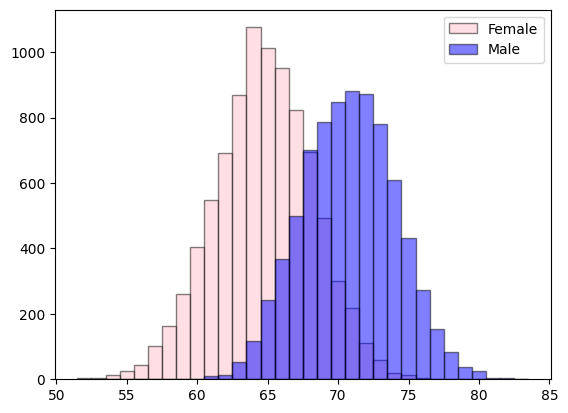

In [12]:
fig, ax = plt.subplots()
ax.bar(bin_edges[:-1], H_Female, width=width, align='edge', color='pink', edgecolor='black', alpha=0.5, label='Female')
ax.bar(bin_edges[:-1], H_Male,   width=width, align='edge', color='blue', edgecolor='black', alpha=0.5, label='Male')
ax.legend()
plt.show()

## Classify queries

In [13]:
queries

,Query (inches)
0,55
1,60
2,65
3,70
4,75
5,80


In [14]:
bin_indices_at_queries = np.digitize(np.clip(queries, X_min, X_max), bin_edges, right=False) - 1
bin_indices_at_queries

array([ 3,  8, 13, 18, 23, 28])

In [15]:
retrieved_counts_Female = H_Female[bin_indices_at_queries]
retrieved_counts_Male   = H_Male[bin_indices_at_queries]

In [18]:
prob_Female_given_height = retrieved_counts_Female / (retrieved_counts_Female + retrieved_counts_Male)
PH = prob_Female_given_height
PH

array([1.        , 0.99753086, 0.80781499, 0.26045296, 0.02702703,
       0.        ])

In [19]:
gender_Female_given_height = ['Female' if p > 0.5 else 'Male' for p in prob_Female_given_height]
GH = gender_Female_given_height
GH

['Female', 'Female', 'Female', 'Male', 'Male', 'Male']

# Bayesian Classifier

## Function to compute PDF

In [17]:
def pdf(x, mu, sigma):
  factor = 1/(np.sqrt(2*np.pi)*sigma)
  return factor*np.exp(-0.5*((x-mu)/sigma)**2)

## Compute Bayesian parameters

In [18]:
mu_Female = np.mean(X[y == 'Female'])
mu_Male   = np.mean(X[y == 'Male'])
sigma_Female = np.std(X[y == 'Female'], ddof=1)
sigma_Male   = np.std(X[y == 'Male'], ddof=1)
N_Female = len(X[y == 'Female'])
N_Male   = len(X[y == 'Male'])

## Classify queries

In [19]:
estimated_counts_Female = N_Female*width*pdf(queries, mu_Female, sigma_Female)
estimated_counts_Male   = N_Male  *width*pdf(queries, mu_Male,   sigma_Male)

In [20]:
PB = estimated_counts_Female / (estimated_counts_Female + estimated_counts_Male)
GB = ['Female' if p > 0.5 else 'Male' for p in PB]

# Summary

In [21]:
pd.DataFrame({'Query': queries, 'PH': PH, 'GH': GH, 'PB': PB, 'GB': GB})

,Query,PH,GH,PB,GB
0,55,1.000000,Female,0.999459,Female
1,60,0.997531,Female,0.988479,Female
2,65,0.807815,Female,0.831704,Female
3,70,0.260453,Male,0.261068,Male
4,75,0.027027,Male,0.030398,Male
5,80,0.000000,Male,0.003441,Male
